#### Testing model with real world images

In [1]:
import os

img_dir = "/Datasets/handpalm/frames/"  # frames
# img_dir = "/Datasets/handpalm/pictures/"  # pictures
img_files = [img_dir + f for f in os.listdir(img_dir)]

print("%s images found" % (len(img_files)))

163 images found


In [2]:
import _40k_dataset
import importlib
importlib.reload(_40k_dataset)  # hot-reload

import functools
from _40k_dataset import real_augment, get_real_dataset

# real_cfg = {'scale': 1 / 255., 'resize':(256,256), 'togray': True}
real_cfg = {'scale': 1 / 255., 'resize':(256,256), 'togray': False}
real_preprocessing_fn = functools.partial(real_augment, **real_cfg)
real_ds = get_real_dataset(img_files,
                           preproc_fn=real_preprocessing_fn,
                           batch_size=8)

In [3]:
import _40k_model
from tensorflow.python.keras import models
from _40k_model import bce_dice_loss, dice_loss

# save_model_path = '/Datasets/5k-palms/40k-weights-100ep-3.5k-gray.h5'
save_model_path = '/Datasets/5k-palms/40k-weights-100ep-3.5k.h5'
model = models.load_model(save_model_path, 
        custom_objects={
            'bce_dice_loss': bce_dice_loss,
            'dice_loss': dice_loss})

In [7]:

TRABAJAR EN COLAB, SUBIR DATASET, SEGUIR TUTORIAL 
https://medium.com/tensorflow/training-and-serving-ml-models-with-tf-keras-fd975cc0fa27


import tensorflow as tf
from tensorflow.python.saved_model import builder as saved_model_builder
from tensorflow.python.saved_model import tag_constants, signature_constants, signature_def_utils_impl

with tf.Session(graph=tf.Graph()) as sess:
    x = model.input
    y = model.output

    prediction_signature = tf.saved_model.signature_def_utils.predict_signature_def({"inputs": x}, {"prediction":y})

    valid_prediction_signature = tf.saved_model.signature_def_utils.is_valid_signature(prediction_signature)

    if(valid_prediction_signature == False):
        raise("invalid signature")

    builder = saved_model_builder.SavedModelBuilder("/Datasets/5k-palms/models/40k")
    legacy_init_op = tf.group(tf.tables_initializer(), name='legacy_init_op')
    builder.add_meta_graph_and_variables(
          sess, [tag_constants.SERVING],
          signature_def_map={
               signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY:prediction_signature,
          },
          legacy_init_op=legacy_init_op)
    builder.save()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /Datasets/5k-palms/models/40k/saved_model.pb


### Frames with color model

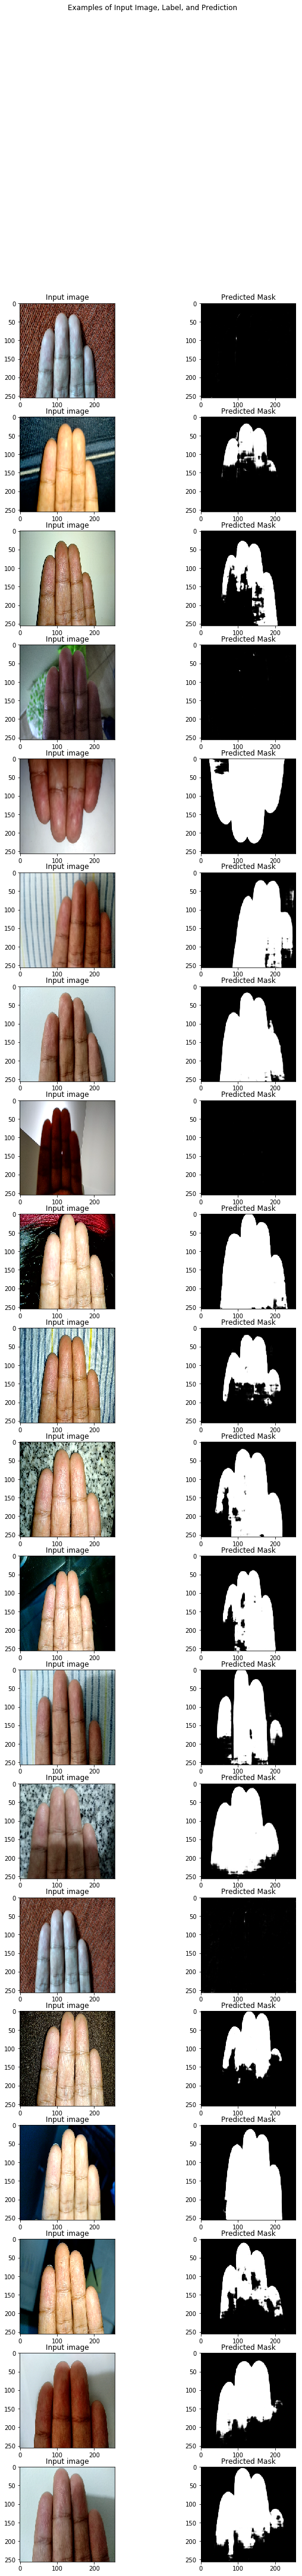

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Let's visualize some of the outputs 
data_aug_iter = real_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()

# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 70))
num_imgs = 20
for i in range(num_imgs):
    batch_of_imgs = tf.keras.backend.get_session().run(next_element)
    img = batch_of_imgs[0]
    predicted_label = model.predict(batch_of_imgs)[0]

    plt.subplot(num_imgs, 2, 2 * i + 1)
    plt.imshow(img)
    plt.title("Input image")

    plt.subplot(num_imgs, 2, 2 * i + 2)
    plt.imshow(predicted_label[:, :, 0], cmap='gray')
    plt.title("Predicted Mask")
    
plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()

### Frames (model without color)

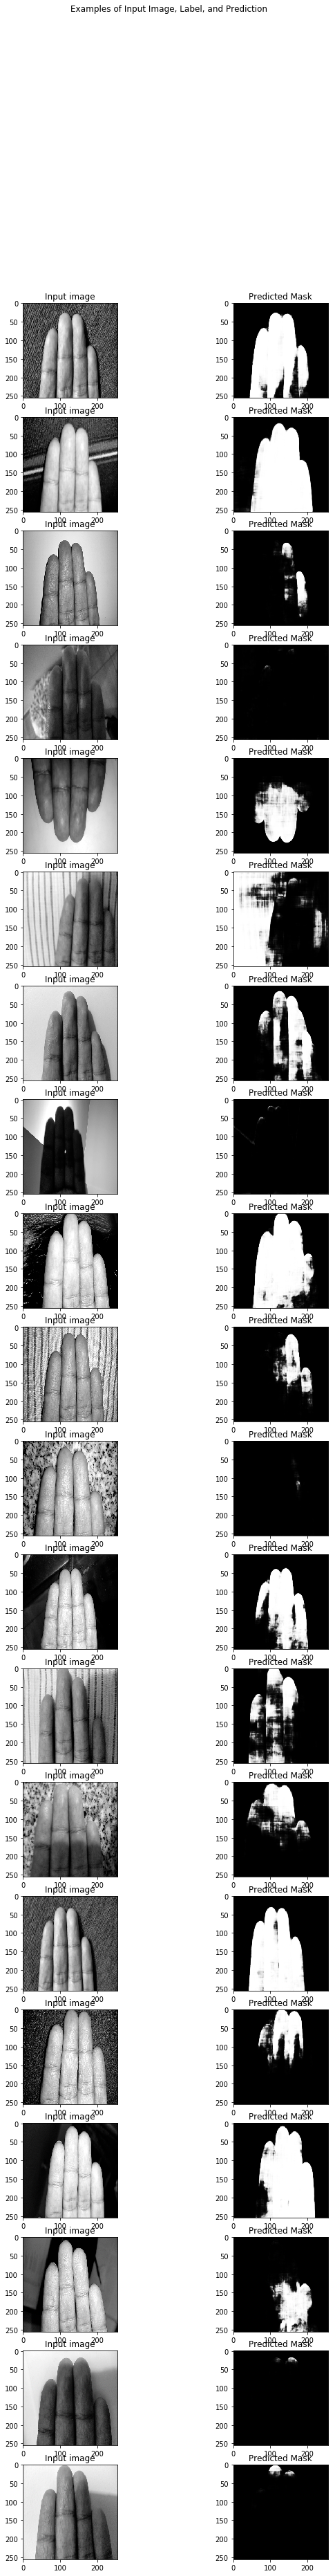

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Let's visualize some of the outputs 
data_aug_iter = real_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()

# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 60))
num_imgs = 20
for i in range(num_imgs):
    batch_of_imgs = tf.keras.backend.get_session().run(next_element)
    img = batch_of_imgs[0]
    predicted_label = model.predict(batch_of_imgs)[0]
    
    plt.subplot(num_imgs, 2, 2 * i + 1)    
    plt.imshow(img[:,:,0], cmap='gray')
    plt.title("Input image")

    plt.subplot(num_imgs, 2, 2 * i + 2)
    plt.imshow(predicted_label[:, :, 0], cmap='gray')
    plt.title("Predicted Mask")
    
plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()

#### Frames

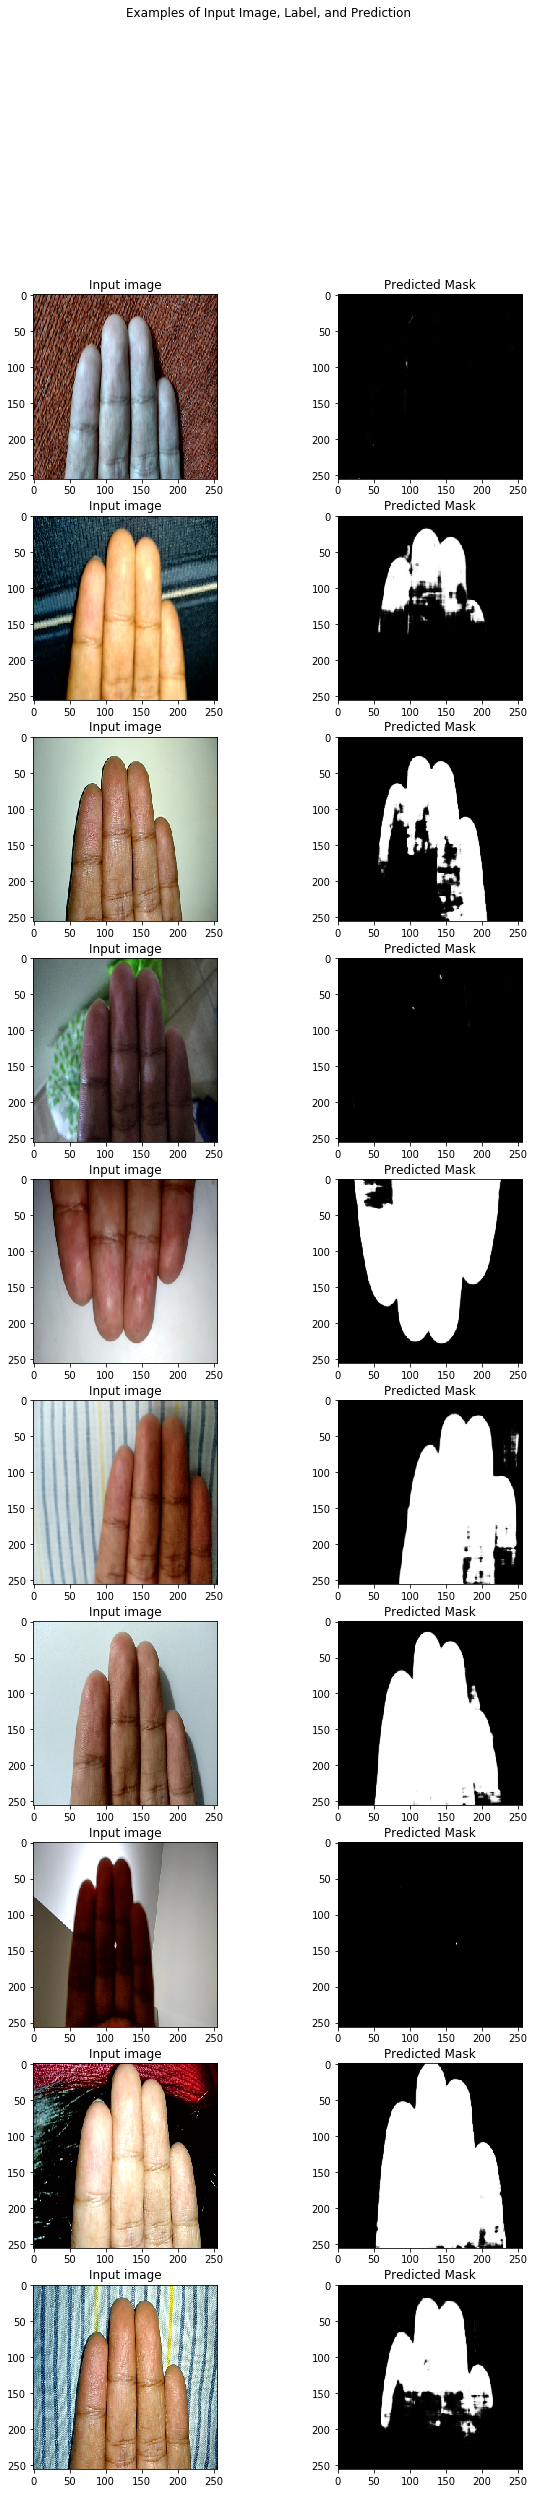

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Let's visualize some of the outputs 
data_aug_iter = real_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()

# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10,40))
num_imgs = 10
for i in range(num_imgs):
    batch_of_imgs = tf.keras.backend.get_session().run(next_element)
    img = batch_of_imgs[0]
    predicted_label = model.predict(batch_of_imgs)[0]

    plt.subplot(num_imgs, 2, 2 * i + 1)
    plt.imshow(img)
    plt.title("Input image")

    plt.subplot(num_imgs, 2, 2 * i + 2)
    plt.imshow(predicted_label[:, :, 0], cmap='gray')
    plt.title("Predicted Mask")
    
plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()